## Taking Input Cleaned CSV file

In [1]:
import pandas as pd 
from scipy.stats import gaussian_kde
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the CSV file
df = pd.read_csv('heart_2022_cleaned.csv')

In [2]:
df.shape # Dimension of the input.

(444975, 40)

In [3]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,0.0,0.0,3,0,8.0,4,0,...,1.70269,83.074632,28.529907,0,0,1,0,2,0,0
1,0,0,0,0.0,0.0,4,0,6.0,4,0,...,1.60000,68.040000,26.570000,0,0,0,0,0,0,0
2,0,0,4,2.0,3.0,3,1,5.0,4,0,...,1.57000,63.500000,25.610000,0,0,0,0,4,0,2
3,0,0,0,0.0,0.0,3,1,7.0,4,0,...,1.65000,63.500000,23.300000,0,0,1,1,0,0,0
4,0,0,1,2.0,0.0,3,1,9.0,4,0,...,1.57000,53.980000,21.770000,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444970,48,0,2,0.0,3.0,1,1,6.0,3,0,...,1.65000,69.850000,25.630000,2,1,0,0,0,0,2
444971,48,0,0,2.0,2.0,3,1,7.0,3,0,...,1.70000,83.010000,28.660000,0,1,1,0,2,0,0
444972,48,0,3,30.0,30.0,0,0,5.0,0,0,...,1.70000,49.900000,17.230000,2,0,0,0,0,0,0
444973,48,1,4,0.0,0.0,3,0,5.0,3,1,...,1.83000,108.860000,32.550000,0,1,1,1,0,0,2


## Correlation Heatmap of all Variables

<Axes: >

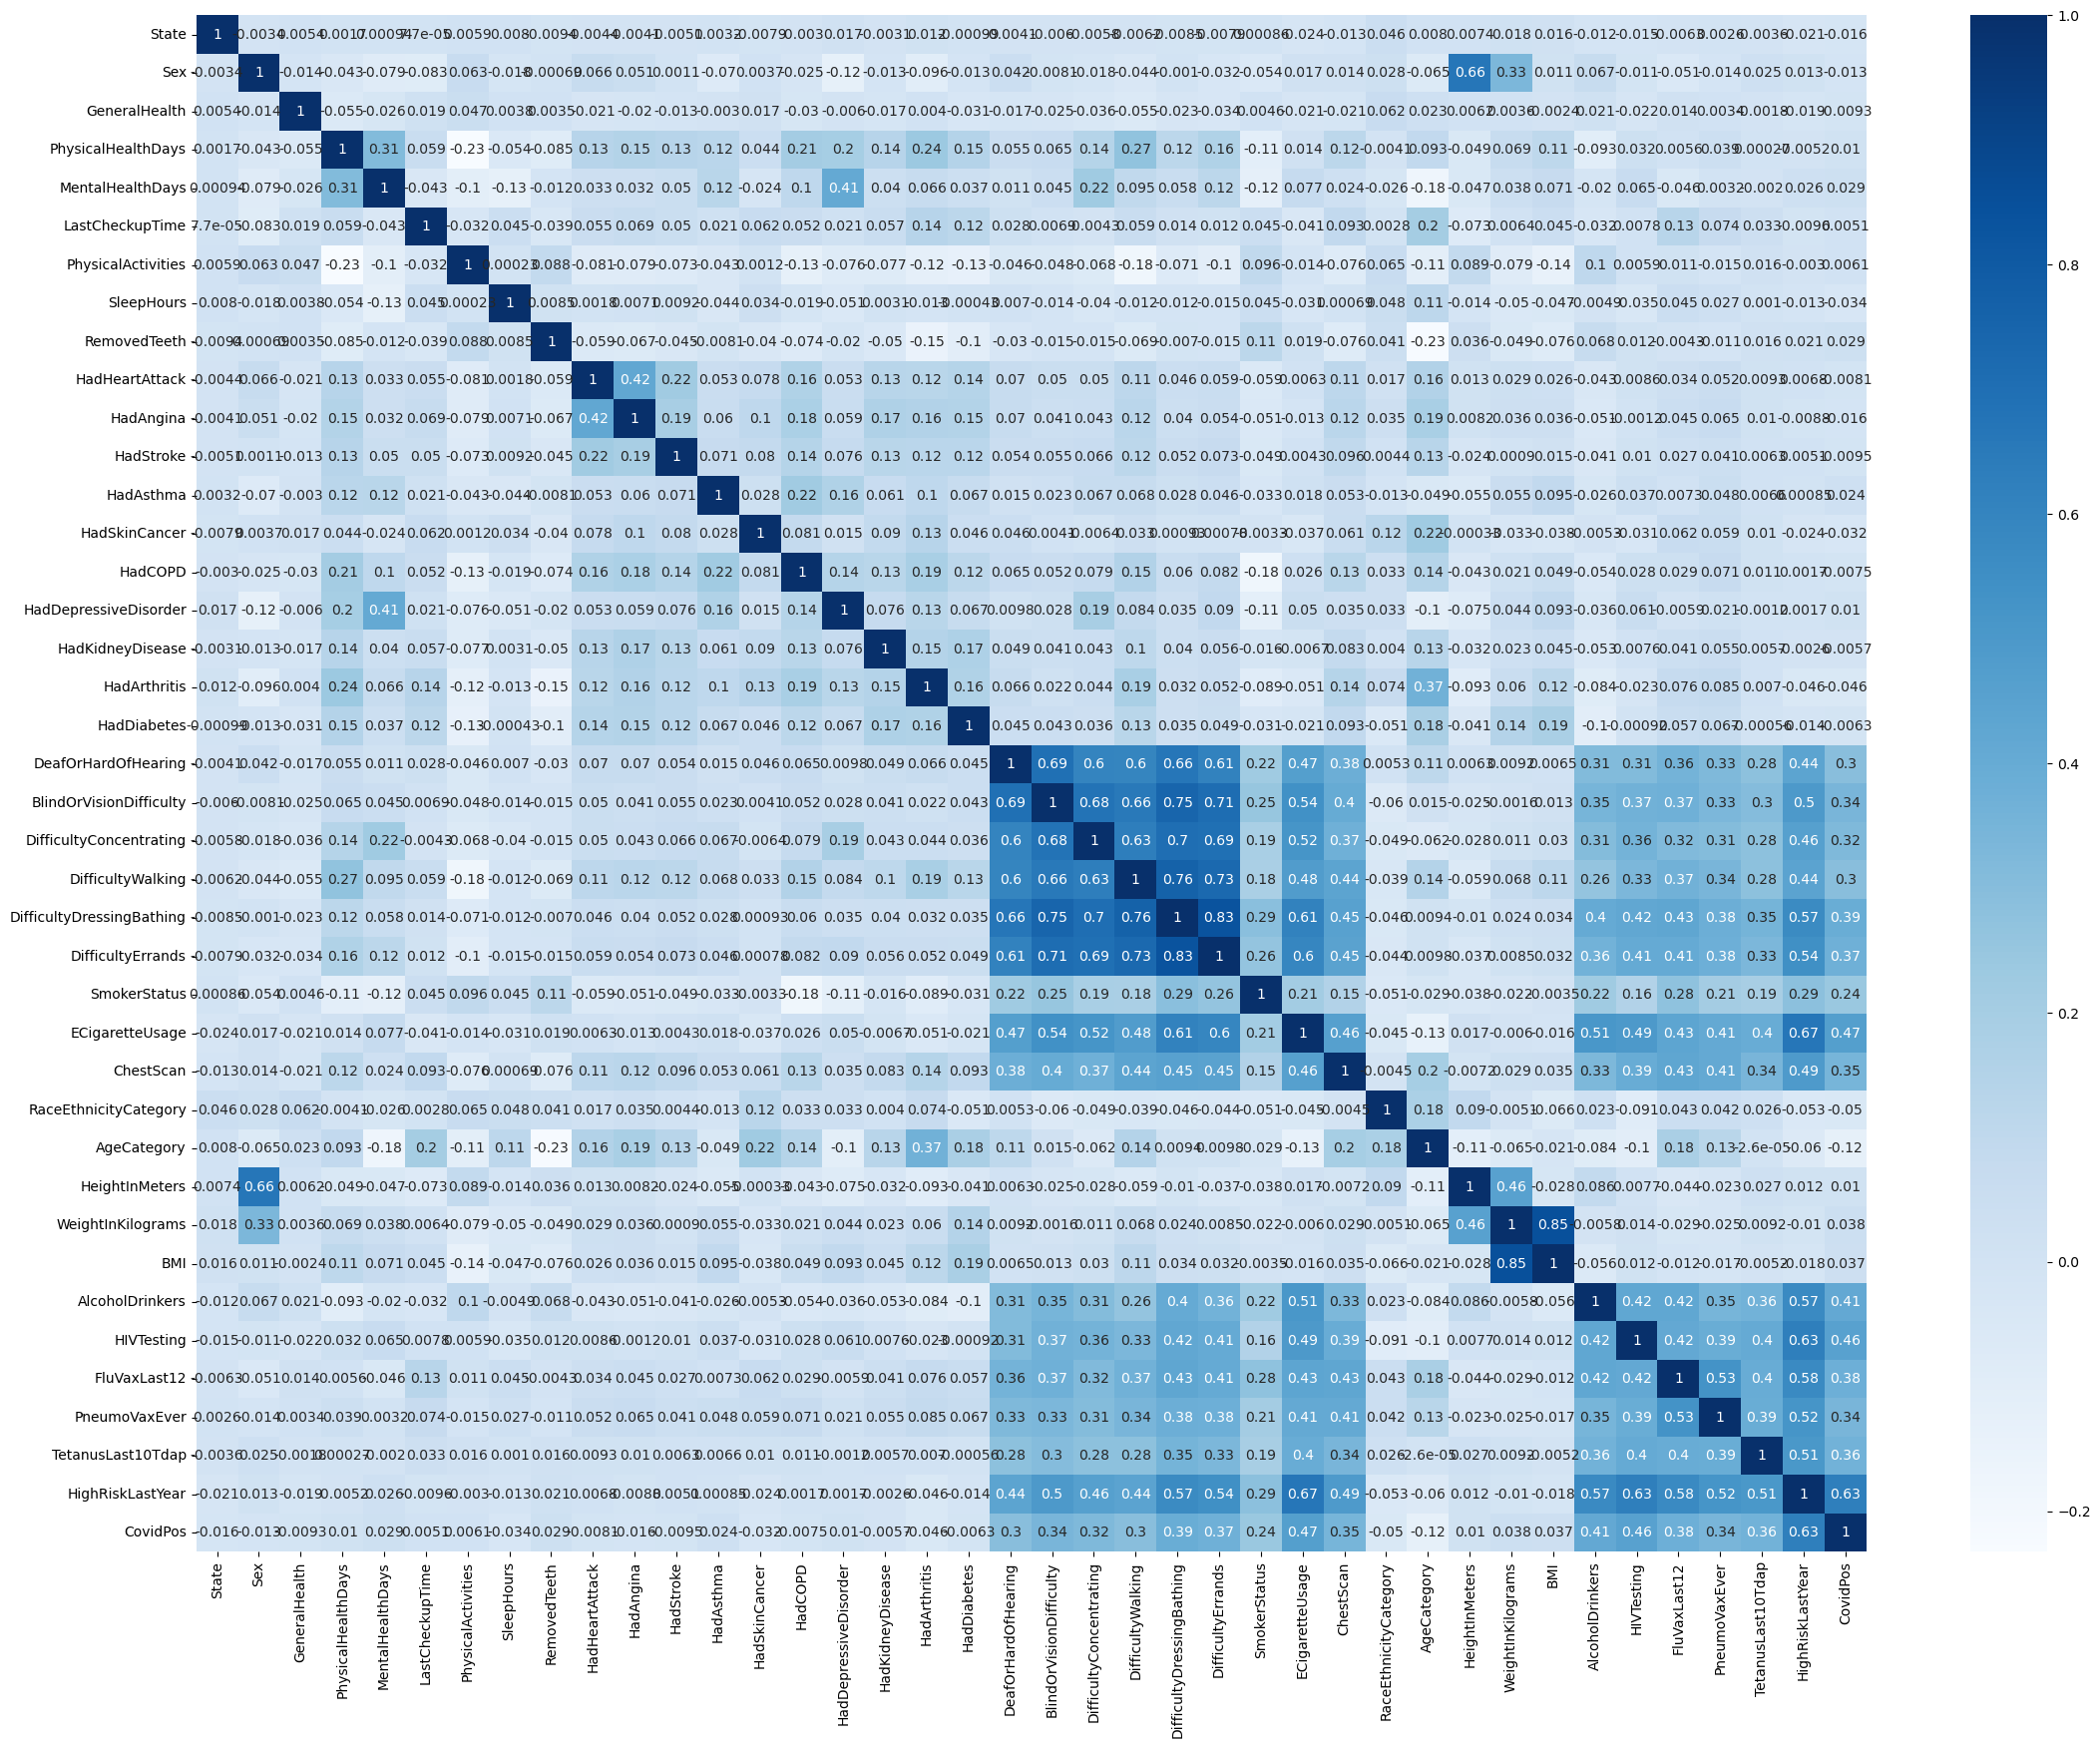

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(27,20))
sns.heatmap(data= df.corr(),cmap='Blues', annot=True)

## Visualization of Data(Variables)

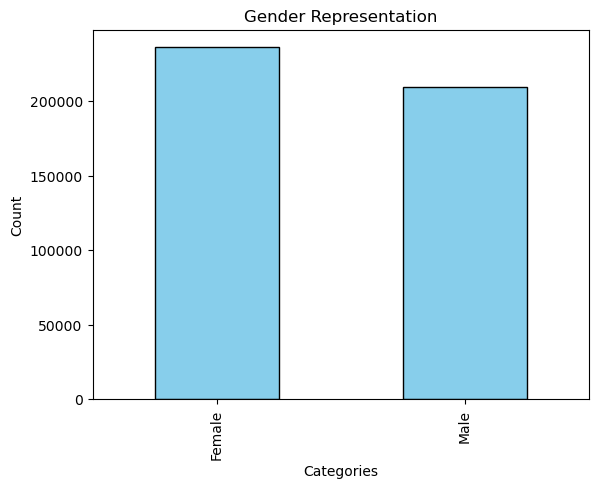

In [5]:
# Bar plot for Gender

df['Sex'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Update x-axis labels to reflect the values 0 and 1
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Add title and axis labels
plt.title('Gender Representation')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

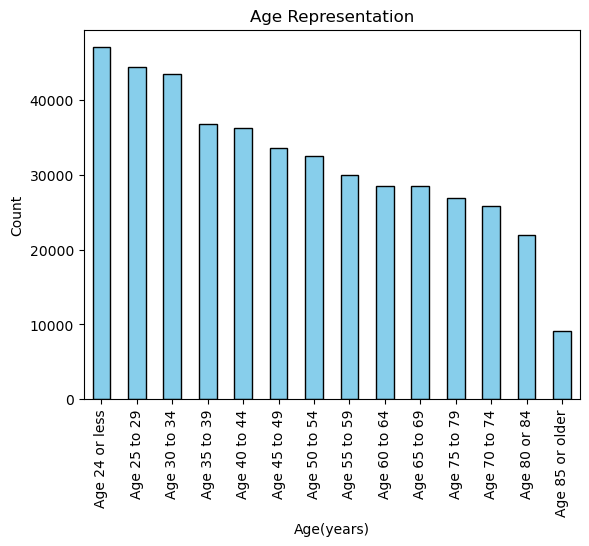

In [6]:
# Bar plot for age

df['AgeCategory'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Update x-axis labels
plt.xticks(ticks=[12, 7, 4, 10, 11, 9, 3, 2, 1, 0, 13, 5, 6, 8], labels=['Age 80 or 84', 'Age 55 to 59','Age 40 to 44','Age 75 to 79','Age 70 to 74','Age 65 to 69','Age 35 to 39','Age 30 to 34','Age 25 to 29','Age 24 or less','Age 85 or older','Age 45 to 49','Age 50 to 54','Age 60 to 64'])

# Add title and axis labels
plt.title('Age Representation')
plt.xlabel('Age(years)')
plt.ylabel('Count')

plt.show()

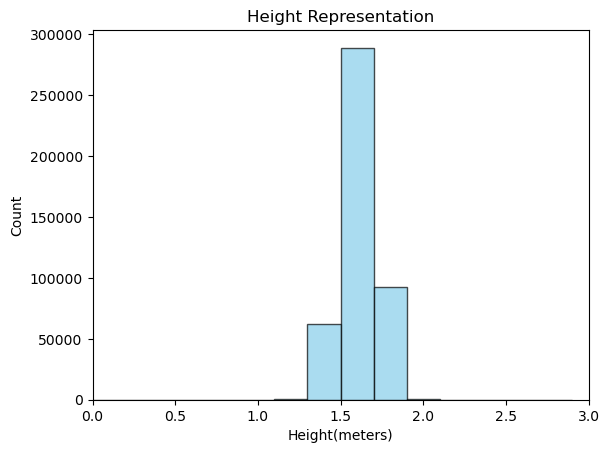

In [7]:
# Histogram represntation of Height
data = df['HeightInMeters'].dropna()  # Drop missing values
bins = np.arange(0, 3.2, 0.2)  # Create bin edges with a step of 0.2
hist, bin_edges = np.histogram(data, bins=bins)

# Plot the histogram using bar()
plt.bar(bin_edges[:-1], hist, width=0.2, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Height Representation')
plt.xlabel('Height(meters)')
plt.ylabel('Count')

# Ensure x-axis and y-axis start at 0
plt.xlim(0, 3)
plt.ylim(0, None)

plt.show()

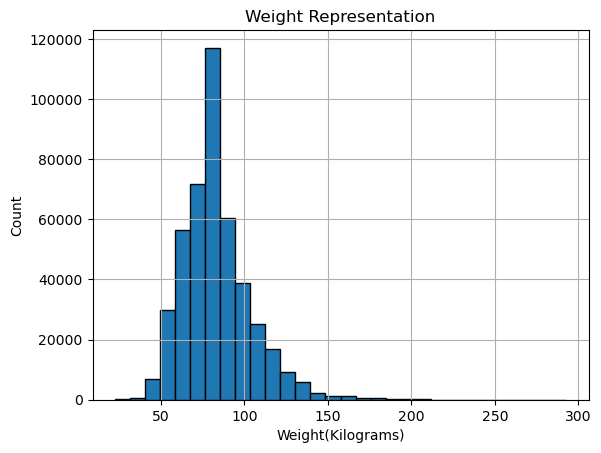

In [8]:
# Histogram represntation of Weight

df['WeightInKilograms'].hist(bins=30, edgecolor='black')

# Add title and axis labels
plt.title('Weight Representation')
plt.xlabel('Weight(Kilograms)')
plt.ylabel('Count')

plt.show()

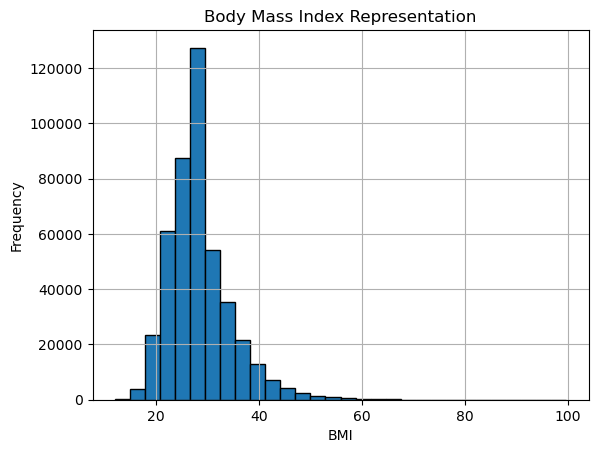

In [9]:
# Histogram represntation of BMI

df['BMI'].hist(bins=30, edgecolor='black')

# Add title and axis labels
plt.title('Body Mass Index Representation')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

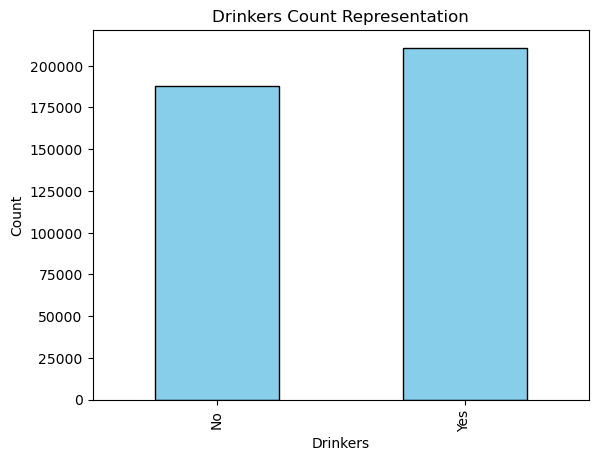

In [10]:
# Bar plot for Drinkers

# Filter the data to include only 0 and 1
filtered_counts = df['AlcoholDrinkers'].value_counts().loc[[0, 1]]

# Plot the filtered data
filtered_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Update x-axis labels to reflect the values 0 and 1
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # 'No' for 0, 'Yes' for 1

# Add title and axis labels
plt.title('Drinkers Count Representation')
plt.xlabel('Drinkers')
plt.ylabel('Count')

plt.show()

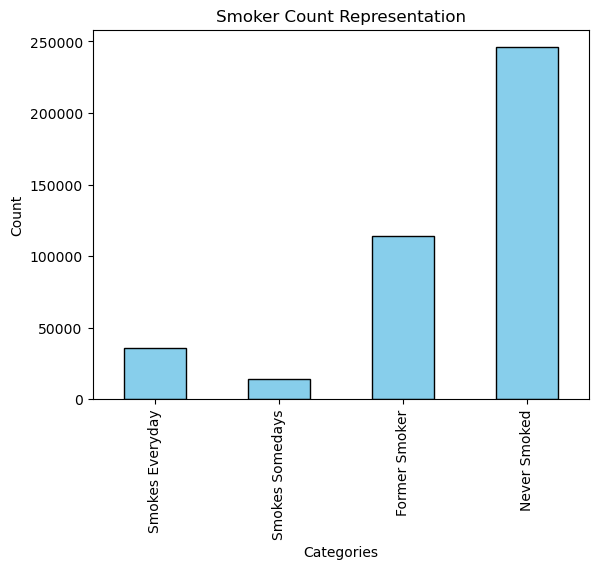

In [11]:
# Bar plot for Smokers

filtered_counts = df['SmokerStatus'].value_counts().loc[[0, 1, 2, 3]]

filtered_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and axis labels
plt.xticks(ticks=[0, 1, 2 ,3], labels=['Smokes Everyday', 'Smokes Somedays', 'Former Smoker', 'Never Smoked'])
plt.title('Smoker Count Representation')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()

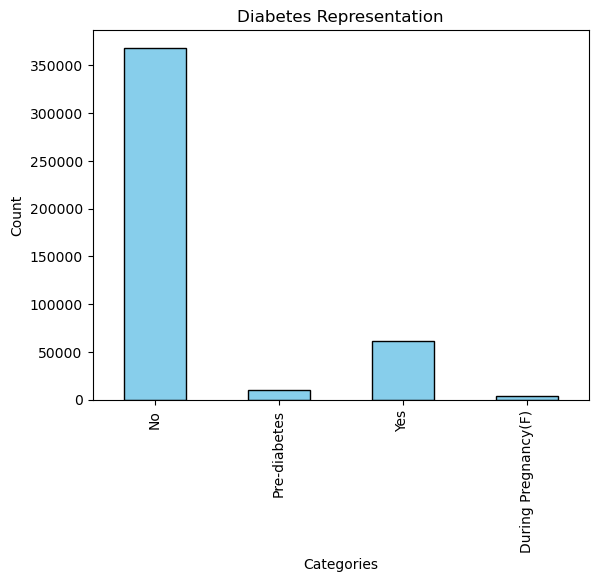

In [12]:
# Bar plot for Diabetic Person

# Filter the data to include only 0 and 1
filtered_counts = df['HadDiabetes'].value_counts().loc[[0, 1, 2, 3]]

# Plot the filtered data
filtered_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Update x-axis labels to reflect the values 0 and 1
plt.xticks(ticks=[0, 1, 2, 3], labels=['No', 'Pre-diabetes', 'Yes', 'During Pregnancy(F)'])  # 'No' for 0, 'Yes' for 1

# Add title and axis labels
plt.title('Diabetes Representation')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()

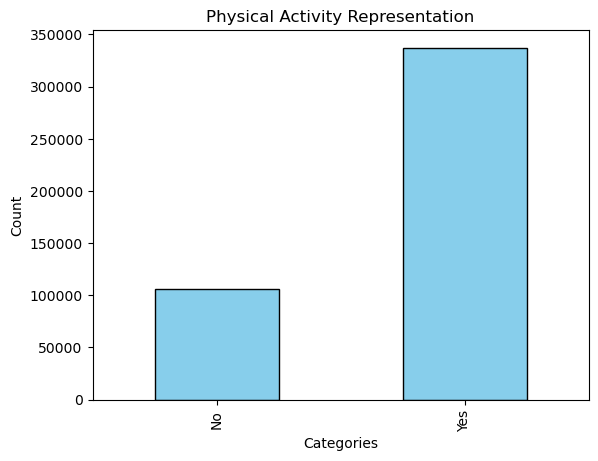

In [13]:
# Bar plot for Physical Activity

filtered_counts = df['PhysicalActivities'].value_counts().loc[[0, 1]]

filtered_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and axis labels
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Physical Activity Representation')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()

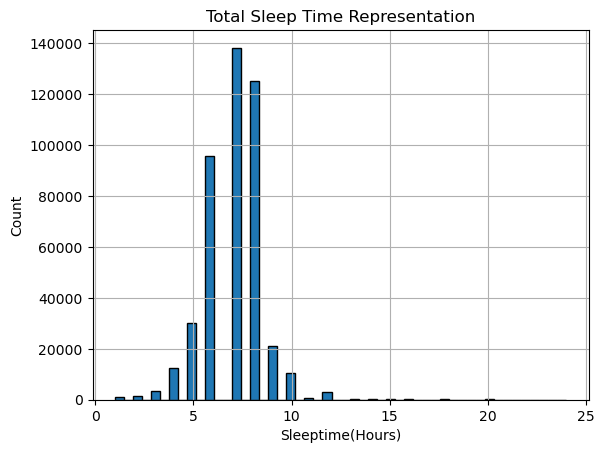

In [14]:
# Histogram represntation of Sleephours

df['SleepHours'].hist(bins=50, edgecolor='black')

# Add title and axis labels
plt.title('Total Sleep Time Representation')
plt.xlabel('Sleeptime(Hours)')
plt.ylabel('Count')

plt.show()

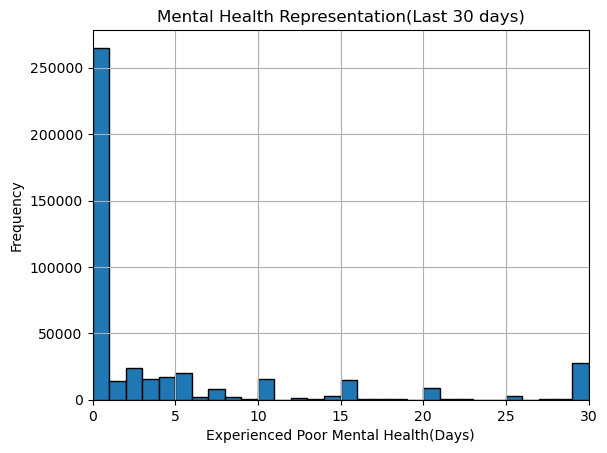

In [15]:
# Histogram represntation of Mental Health Days(30 Days) 

df['MentalHealthDays'].hist(bins=30, range=(0, 30), edgecolor='black')  # Set range from 0 to 30

# Add title and axis labels
plt.title('Mental Health Representation(Last 30 days)')
plt.xlabel('Experienced Poor Mental Health(Days)')
plt.ylabel('Frequency')

plt.xlim(0, 30)  # Ensure x-axis starts at 0
plt.ylim(0, None)  # Ensure y-axis starts at 0, None allows it to auto-scale upwards

plt.show()